In [284]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Problem definition

**Context**

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information

1) **id:** unique identifier

2) **gender:** "Male", "Female" or "Other"

3) **age:** age of the patient

4) **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) **ever_married: "No" or "Yes"

7) **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) **Residence_type:** "Rural" or "Urban"

9) **avg_glucose_level:** average glucose level in blood

10) **bmi:** body mass index

11) **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) **stroke:** 1 if the patient had a stroke or 0 if not

**Note:** "Unknown" in smoking_status means that the information is unavailable for this patient

Acknowledgements (Confidential Source) - Use only for educational purposes If you use this dataset in your research, please credit the author.

# Libraries needed for this Study

Let us import necessary libraries.

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.7f' % x)

## Reading the Dataset

In [286]:
df0 = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [287]:
df = df0.copy()

In [288]:
df.head()

id  gender        age  hypertension  heart_disease ever_married  \
0   9046    Male 67.0000000             0              1          Yes   
1  51676  Female 61.0000000             0              0          Yes   
2  31112    Male 80.0000000             0              1          Yes   
3  60182  Female 49.0000000             0              0          Yes   
4   1665  Female 79.0000000             1              0          Yes   

       work_type Residence_type  avg_glucose_level        bmi  \
0        Private          Urban        228.6900000 36.6000000   
1  Self-employed          Rural        202.2100000        NaN   
2        Private          Rural        105.9200000 32.5000000   
3        Private          Urban        171.2300000 34.4000000   
4  Self-employed          Rural        174.1200000 24.0000000   

    smoking_status  stroke  
0  formerly smoked       1  
1     never smoked       1  
2     never smoked       1  
3           smokes       1  
4     never smoked       1

## EDA

**A General Looking at the Data**

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


describe() function gives us a general descriptive summary of each continuous attribute such as the count, mean, the min, max values and some percentiles as well.

In [290]:
df.describe().T

count          mean           std        min  \
id                5110.0000000 36517.8293542 21161.7216248 67.0000000   
age               5110.0000000    43.2266145    22.6126467  0.0800000   
hypertension      5110.0000000     0.0974560     0.2966067  0.0000000   
heart_disease     5110.0000000     0.0540117     0.2260630  0.0000000   
avg_glucose_level 5110.0000000   106.1476771    45.2835602 55.1200000   
bmi               4909.0000000    28.8932369     7.8540667 10.3000000   
stroke            5110.0000000     0.0487280     0.2153199  0.0000000   

                            25%           50%           75%           max  
id                17741.2500000 36932.0000000 54682.0000000 72940.0000000  
age                  25.0000000    45.0000000    61.0000000    82.0000000  
hypertension          0.0000000     0.0000000     0.0000000     1.0000000  
heart_disease         0.0000000     0.0000000     0.0000000     1.0000000  
avg_glucose_level    77.2450000    91.8850000   114.0900000   271.7400000  
bmi                  23.5000000    28.1000000    33.1000000    97.6000000  
stroke                0.0000000     0.0000000     0.0000000     1.0000000

In [291]:
df.describe(include=object).T

count unique           top  freq
gender          5110      3        Female  2994
ever_married    5110      2           Yes  3353
work_type       5110      5       Private  2925
Residence_type  5110      2         Urban  2596
smoking_status  5110      4  never smoked  1892

In [292]:
print(f"Data has {df.shape[0]} instances and {df.shape[1] - 1} attributes.")

Data has 5110 instances and 11 attributes.


In [293]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [294]:
df.duplicated().value_counts()

False    5110
dtype: int64

In [295]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [296]:
missing(df)

Missing_Number  Missing_Percent
bmi                           201        0.0393346
id                              0        0.0000000
gender                          0        0.0000000
age                             0        0.0000000
hypertension                    0        0.0000000
heart_disease                   0        0.0000000
ever_married                    0        0.0000000
work_type                       0        0.0000000
Residence_type                  0        0.0000000
avg_glucose_level               0        0.0000000
smoking_status                  0        0.0000000
stroke                          0        0.0000000

Distribution of the target variable is one of the most important things in a classification problem. So let's a close look at how its values are distributed.

In [297]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

It's clear that the proportinate distribution for each class is not the case here. So we should assume an imbalanced data in the given case.

### Data Cleaning

In "id" column, all the values are unique. Let's drop the "id" column.

In [298]:
df.drop('id', axis=1, inplace=True)

In [299]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

The column of 'Residence_type' begins with uppercase while others are not. To make a standardize grammer to prevent mistake we will change all column names into lowercase

In [300]:
df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [301]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [302]:
#df.bmi.value_counts(dropna=False).index.sort_values()

In [303]:
#df[df.bmi.isnull()][['age','bmi']].sort_values(by='age').sample(20)

In [304]:
# def fill_most(df0, group_col, col_name):
#     '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
#     for group in list(df0[group_col].unique()):
#         cond = df0[group_col]==group
#         mode = list(df0[cond][col_name].mode())
#         if mode != []:
#             df0.loc[cond, col_name] = df0.loc[cond, col_name].fillna(df0[cond][col_name].mode()[0])
#         else:
#             df0.loc[cond, col_name] = df0.loc[cond, col_name].fillna(df0[col_name].mode()[0])
#     print("Number of NaN : ",df0[col_name].isnull().sum())
#     print("------------------")
#     print(df0[col_name].value_counts(dropna=False))

In [305]:
#fill_most(df, 'age', 'bmi')

In [306]:
#df.bmi.value_counts(dropna=False).isnull().sum()

In [307]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In the "gender" column there has been an undefined classification which makes no contribution to understand stroke. So let's discard this row from the analysis.

In [308]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)

In [309]:
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

Before deeping into the analysis it would be benefical to examine the correlation among variables using heatmap.

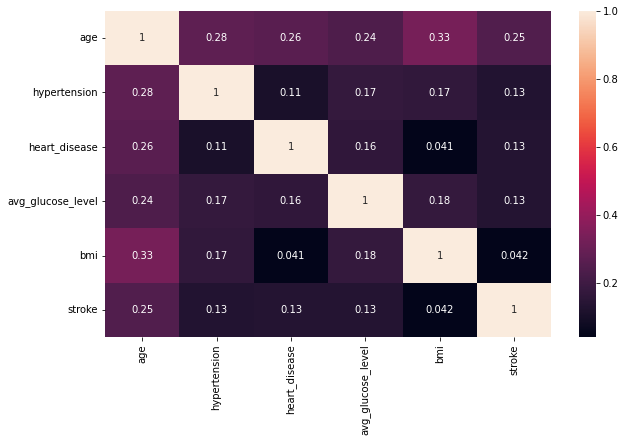

In [310]:
sns.heatmap(df.corr(), annot=True);

Let's split our features into two part, numerical and categorical, for easing our further examination. 

In [311]:
numerical= df.drop(['stroke'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print("\033[1m", "Numerical Columns:", "\033[0;0m",  numerical)
print("------------------------------------------------------------------------------------------------------------------")
print("\033[1m", "Categorical Columns:", "\033[0;0m", categorical)

 Numerical Columns:  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')
------------------------------------------------------------------------------------------------------------------
 Categorical Columns:  Index(['gender', 'ever_married', 'work_type', 'residence_type',
       'smoking_status'],
      dtype='object')


# The Examination of Target Variable

In [312]:
df['stroke'].describe().T

count   5109.0000000
mean       0.0487375
std        0.2153399
min        0.0000000
25%        0.0000000
50%        0.0000000
75%        0.0000000
max        1.0000000
Name: stroke, dtype: float64

In [313]:
df['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

In [314]:
print( f"Skewness: {df['stroke'].skew()}")

Skewness: 4.1928068074994735


In [315]:
df['stroke'].iplot(kind='hist')

# Numerical Features

In [316]:
df[numerical].describe().T

count        mean        std        min        25%  \
age               5109.0000000  43.2299863 22.6135753  0.0800000 25.0000000   
hypertension      5109.0000000   0.0974750  0.2966326  0.0000000  0.0000000   
heart_disease     5109.0000000   0.0540223  0.2260839  0.0000000  0.0000000   
avg_glucose_level 5109.0000000 106.1403993 45.2850037 55.1200000 77.2400000   
bmi               4908.0000000  28.8945599  7.8543199 10.3000000 23.5000000   

                         50%         75%         max  
age               45.0000000  61.0000000  82.0000000  
hypertension       0.0000000   0.0000000   1.0000000  
heart_disease      0.0000000   0.0000000   1.0000000  
avg_glucose_level 91.8800000 114.0900000 271.7400000  
bmi               28.1000000  33.1000000  97.6000000

In [317]:
df[numerical].iplot(kind='hist');

In [318]:
df[numerical].iplot(kind='histogram',subplots=True,bins=50)

In [319]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [320]:
for i in df.drop(columns=["stroke", 'gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'smoking_status']).columns:
    df[i].iplot(kind="box", title=i, boxpoints="all")

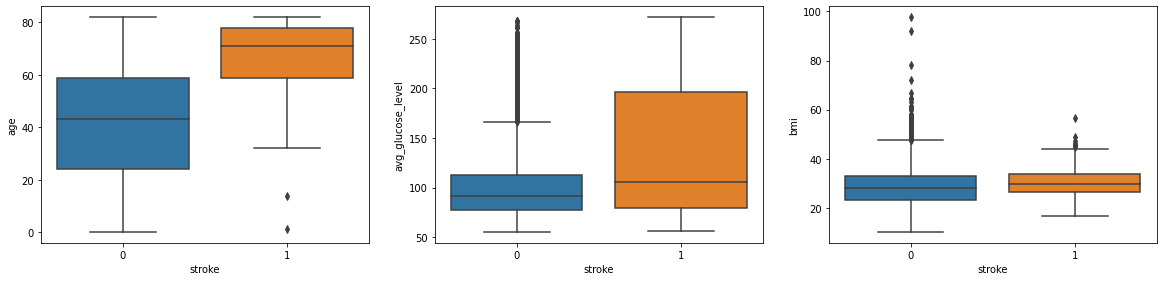

In [321]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.drop(columns=['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'smoking_status']).columns:
    if feature != "stroke":
        index += 1
        plt.subplot(4,3,index)
        sns.boxplot(x='stroke', y=feature, data=df)

In [322]:
df[(df['age'] <= 14) & (df['stroke'] == 1)] 

gender        age  hypertension  heart_disease ever_married work_type  \
162  Female  1.3200000             0              0           No  children   
245  Female 14.0000000             0              0           No  children   

    residence_type  avg_glucose_level        bmi smoking_status  stroke  
162          Urban         70.3700000        NaN        Unknown       1  
245          Rural         57.9300000 30.9000000        Unknown       1

In [323]:
df.age.value_counts()

78.0000000    102
57.0000000     95
52.0000000     90
54.0000000     87
51.0000000     86
45.0000000     85
79.0000000     85
53.0000000     85
55.0000000     83
50.0000000     83
59.0000000     80
31.0000000     79
49.0000000     79
56.0000000     77
37.0000000     76
61.0000000     76
47.0000000     75
44.0000000     75
62.0000000     74
40.0000000     74
63.0000000     74
41.0000000     73
60.0000000     72
38.0000000     72
39.0000000     71
42.0000000     71
32.0000000     71
80.0000000     70
43.0000000     70
34.0000000     68
58.0000000     68
48.0000000     66
5.0000000      65
23.0000000     64
65.0000000     62
46.0000000     62
71.0000000     61
26.0000000     61
18.0000000     60
66.0000000     60
17.0000000     60
81.0000000     60
20.0000000     59
8.0000000      58
13.0000000     57
25.0000000     57
33.0000000     57
82.0000000     56
2.0000000      55
30.0000000     55
24.0000000     55
27.0000000     55
14.0000000     54
35.0000000     54
28.0000000     54
69.0000000

In [324]:
df[df['age'] < 2]

gender       age  hypertension  heart_disease ever_married work_type  \
162   Female 1.3200000             0              0           No  children   
363   Female 0.6400000             0              0           No  children   
376   Female 0.8800000             0              0           No  children   
562   Female 1.8000000             0              0           No  children   
564   Female 0.3200000             0              0           No  children   
597   Female 1.0800000             0              0           No  children   
607   Female 1.8000000             0              0           No  children   
684   Female 1.8000000             0              0           No  children   
753   Female 1.1600000             0              0           No  children   
844     Male 1.0000000             0              0           No  children   
850   Female 1.4000000             0              0           No  children   
913   Female 1.7200000             0              0           No  children   
951     Male 1.0000000             0              0           No  children   
982     Male 0.8800000             0              0           No  children   
995     Male 1.4000000             0              0           No  children   
996     Male 0.2400000             0              0           No  children   
1093  Female 0.3200000             0              0           No  children   
1101    Male 1.6400000             0              0           No  children   
1134    Male 1.5600000             0              0           No  children   
1137    Male 1.7200000             0              0           No  children   
1206  Female 0.7200000             0              0           No  children   
1218    Male 1.8800000             0              0           No  children   
1244  Female 1.2400000             0              0           No  children   
1317    Male 0.8000000             0              0           No  children   
1366    Male 1.0800000             0              0           No  children   
1432    Male 1.0000000             0              0           No  children   
1486    Male 1.8800000             0              0           No  children   
1499  Female 1.2400000             0              0           No  children   
1600    Male 0.4000000             0              0           No  children   
1609  Female 1.2400000             0              0           No  children   
1614  Female 0.0800000             0              0           No  children   
1632  Female 1.4800000             0              0           No  children   
1758    Male 1.7200000             0              0           No  children   
1794    Male 1.0000000             0              0           No  children   
1808  Female 0.6400000             0              0           No  children   
1927  Female 1.4800000             0              0           No  children   
1948  Female 1.4000000             0              0           No  children   
1957  Female 1.5600000             0              0           No  children   
1975    Male 0.5600000             0              0           No  children   
1999    Male 0.2400000             0              0           No  children   
2008    Male 0.5600000             0              0           No  children   
2012    Male 0.6400000             0              0           No  children   
2030    Male 0.4800000             0              0           No  children   
2074    Male 1.3200000             0              0           No  children   
2116    Male 1.2400000             0              0           No  children   
2194    Male 1.7200000             0              0           No  children   
2240  Female 1.0000000             0              0           No  children   
2305    Male 1.0800000             0              0           No  children   
2311  Female 1.1600000             0              0           No  children   
2329  Female 1.8000000             0              0           No  children   
2358    Male 0.8800000      

### Examination of Skewness

In [325]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df[numerical].skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols 

heart_disease       3.9467864
hypertension        2.7150261
avg_glucose_level   1.5728153
bmi                 1.0550629
dtype: float64

Some features have skewness. After visualizing them we will try to handle with their skewness by "np.log" and "PowerTransformer". Let's first take a close look at those in details.

In [326]:
df[skew_cols.index].iplot(kind='hist');

In [327]:
df[skew_cols.index].iplot(kind='histogram',subplots=True,bins=50)

### Handling with Skewness

In [328]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
skew_vals = df[numerical].skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols = skew_cols.drop(['heart_disease', 'hypertension'])
skew_cols

avg_glucose_level   1.5728153
bmi                 1.0550629
dtype: float64

In [329]:
df_try = df.copy()
for col in skew_cols.index.values:
    df_try[col] = df_try[col].apply(np.log1p)
print(df_try[skew_cols.index].skew())
print()
df_try[skew_cols.index].iplot(kind='histogram',subplots=True,bins=50);

avg_glucose_level   0.8900502
bmi                 0.0315252
dtype: float64



In [330]:
df_trans = df[skew_cols.index].copy()
pt = PowerTransformer(method='yeo-johnson')
trans= pt.fit_transform(df_trans)
df_trans = pd.DataFrame(trans, columns =skew_cols.index )
print(df_trans.skew())
print()
df_trans.iplot(kind='histogram',subplots=True,bins=50);

avg_glucose_level    0.0845788
bmi                 -0.0007343
dtype: float64



Now it's time to get rid of these skewed features from our dataset and concatenate unskewed ones with the dataset. 

In [331]:
df.shape

(5109, 11)

In [332]:
df.drop(["avg_glucose_level", "bmi"], axis=1, inplace=True)

In [333]:
df.shape

(5109, 9)

In [334]:
df = pd.concat([df, df_trans], axis=1)

In [335]:
df.shape

(5110, 11)

In [336]:
df

gender        age  hypertension  heart_disease ever_married  \
0       Male 67.0000000     0.0000000      1.0000000          Yes   
1     Female 61.0000000     0.0000000      0.0000000          Yes   
2       Male 80.0000000     0.0000000      1.0000000          Yes   
3     Female 49.0000000     0.0000000      0.0000000          Yes   
4     Female 79.0000000     1.0000000      0.0000000          Yes   
...      ...        ...           ...            ...          ...   
5105  Female 80.0000000     1.0000000      0.0000000          Yes   
5106  Female 81.0000000     0.0000000      0.0000000          Yes   
5107  Female 35.0000000     0.0000000      0.0000000          Yes   
5108    Male 51.0000000     0.0000000      0.0000000          Yes   
5109  Female 44.0000000     0.0000000      0.0000000          Yes   

          work_type residence_type   smoking_status    stroke  \
0           Private          Urban  formerly smoked 1.0000000   
1     Self-employed          Rural     never smoked 1.0000000   
2           Private          Rural     never smoked 1.0000000   
3           Private          Urban           smokes 1.0000000   
4     Self-employed          Rural     never smoked 1.0000000   
...             ...            ...              ...       ...   
5105        Private          Urban     never smoked 0.0000000   
5106  Self-employed          Urban     never smoked 0.0000000   
5107  Self-employed          Rural     never smoked 0.0000000   
5108        Private          Rural  formerly smoked 0.0000000   
5109       Govt_job          Urban          Unknown 0.0000000   

      avg_glucose_level        bmi  
0             1.8623916  1.0254995  
1             1.7005113        NaN  
2             0.3950311  0.5771556  
3             1.4451195  0.7916184  
4             1.4729183 -0.5680931  
...                 ...        ...  
5105          0.8225887  1.3603811  
5106         -0.3811672  0.3496818  
5107          1.3952907 -0.3242871  
5108         -0.2843507 -0.2367620  
5109                NaN        NaN  

[5110 rows x 11 columns]

# Categorical Features

In [337]:
df[categorical].head().T

0              1             2        3  \
gender                     Male         Female          Male   Female   
ever_married                Yes            Yes           Yes      Yes   
work_type               Private  Self-employed       Private  Private   
residence_type            Urban          Rural         Rural    Urban   
smoking_status  formerly smoked   never smoked  never smoked   smokes   

                            4  
gender                 Female  
ever_married              Yes  
work_type       Self-employed  
residence_type          Rural  
smoking_status   never smoked

In [338]:
df[categorical].describe()

gender ever_married work_type residence_type smoking_status
count     5109         5109      5109           5109           5109
unique       2            2         5              2              4
top     Female          Yes   Private          Urban   never smoked
freq      2994         3353      2924           2596           1892

### gender & stroke

In [339]:
print(df.groupby('gender')['stroke'].mean().sort_values())
print()
df.groupby('gender')['stroke'].mean().iplot(kind='histogram',subplots=True,bins=50)

gender
Female   0.0470942
Male     0.0510638
Name: stroke, dtype: float64



### ever_married & stroke

In [340]:
print(df.groupby('ever_married')['stroke'].mean().sort_values())
print()
df.groupby('ever_married')['stroke'].mean().iplot(kind='histogram',subplots=True,bins=50)

ever_married
No    0.0165148
Yes   0.0656129
Name: stroke, dtype: float64



### work_type & stroke

In [341]:
print(df.groupby('work_type')['stroke'].mean().sort_values())
print()
df.groupby('work_type')['stroke'].mean().iplot(kind='histogram',subplots=True,bins=50)

work_type
Never_worked    0.0000000
children        0.0029112
Govt_job        0.0502283
Private         0.0509576
Self-employed   0.0793651
Name: stroke, dtype: float64



### residence_type & stroke

In [342]:
print(df.groupby('residence_type')['stroke'].mean().sort_values())
print()
df.groupby('residence_type')['stroke'].mean().iplot(kind='histogram',subplots=True,bins=50)

residence_type
Rural   0.0453641
Urban   0.0520031
Name: stroke, dtype: float64



### smoking_status & stroke

In [343]:
print(df.groupby('smoking_status')['stroke'].mean().sort_values())
print()
df.groupby('smoking_status')['stroke'].mean().iplot(kind='histogram',subplots=True,bins=50)

smoking_status
Unknown           0.0304404
never smoked      0.0475687
smokes            0.0532319
formerly smoked   0.0791855
Name: stroke, dtype: float64



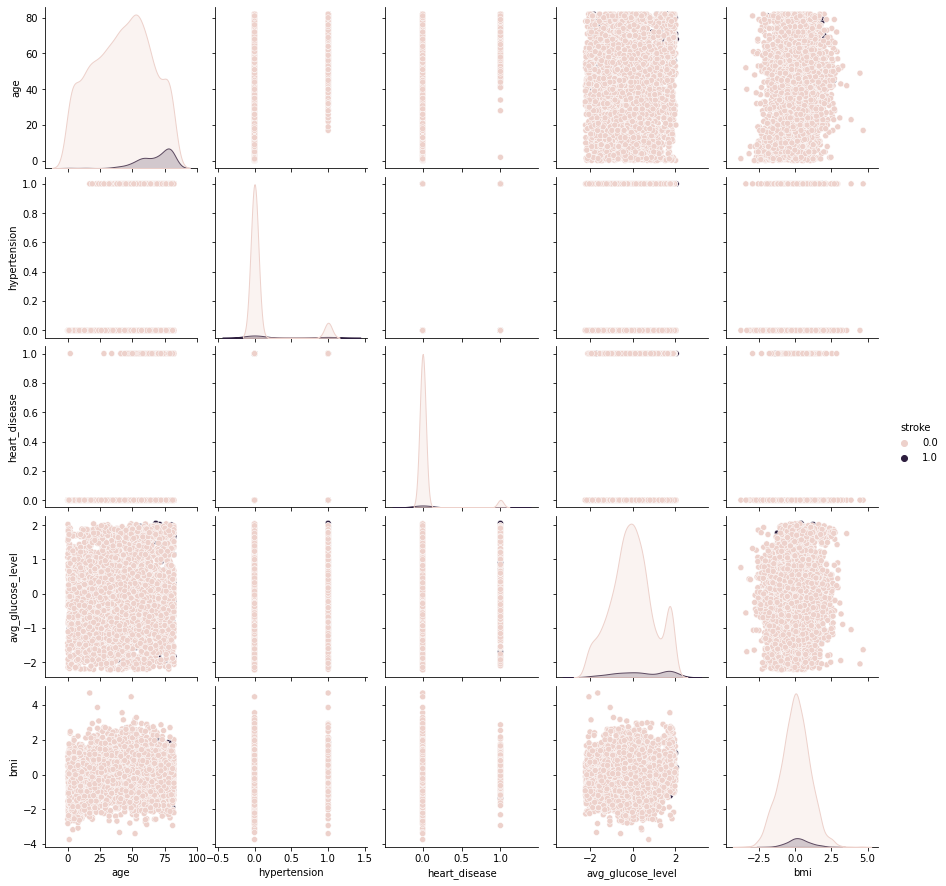

In [344]:
sns.pairplot(df, hue="stroke");

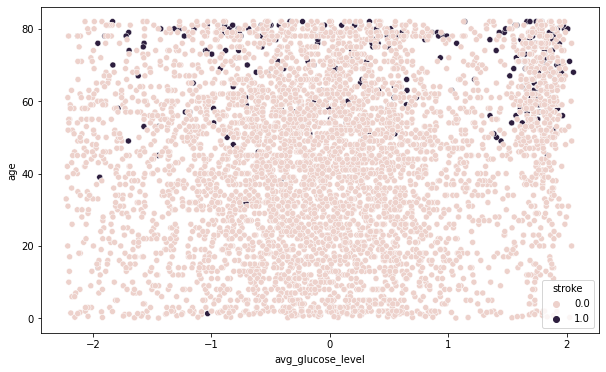

In [347]:
sns.scatterplot(x = 'avg_glucose_level', y = 'age', hue = 'stroke', data = df);

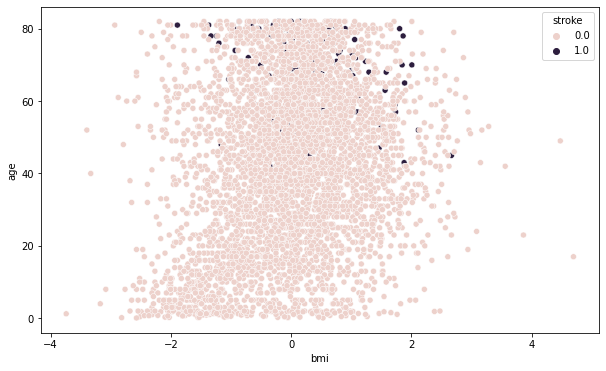

In [348]:
sns.scatterplot(x = 'bmi', y = 'age', hue = 'stroke', data = df);

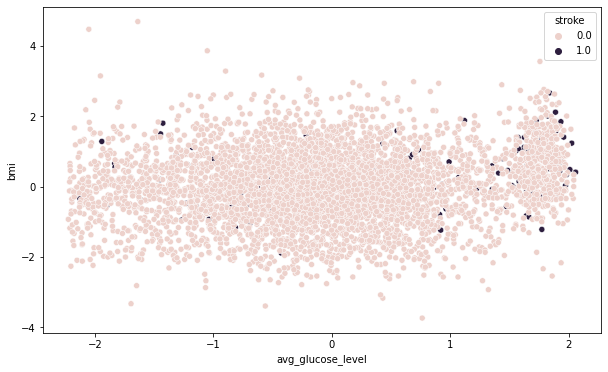

In [349]:
sns.scatterplot(x = 'avg_glucose_level', y = 'bmi', hue = 'stroke', data = df);

In [236]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'smoking_status', 'stroke',
       'avg_glucose_level', 'bmi'],
      dtype='object')

In [350]:
df = pd.get_dummies(df, columns=['gender', 'ever_married',
       'work_type', 'residence_type', 'smoking_status',], drop_first=True)

In [351]:
df.head()

age  hypertension  heart_disease    stroke  avg_glucose_level  \
0 67.0000000     0.0000000      1.0000000 1.0000000          1.8623916   
1 61.0000000     0.0000000      0.0000000 1.0000000          1.7005113   
2 80.0000000     0.0000000      1.0000000 1.0000000          0.3950311   
3 49.0000000     0.0000000      0.0000000 1.0000000          1.4451195   
4 79.0000000     1.0000000      0.0000000 1.0000000          1.4729183   

         bmi  gender_Male  ever_married_Yes  work_type_Never_worked  \
0  1.0254995            1                 1                       0   
1        NaN            0                 1                       0   
2  0.5771556            1                 1                       0   
3  0.7916184            0                 1                       0   
4 -0.5680931            0                 1                       0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                  1                        0                   0   
1                  0                        1                   0   
2                  1                        0                   0   
3                  1                        0                   0   
4                  0                        1                   0   

   residence_type_Urban  smoking_status_formerly smoked  \
0                     1                               1   
1                     0                               0   
2                     0                               0   
3                     1                               0   
4                     0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0  
2                            1                      0  
3                            0                      1  
4                            1                      0

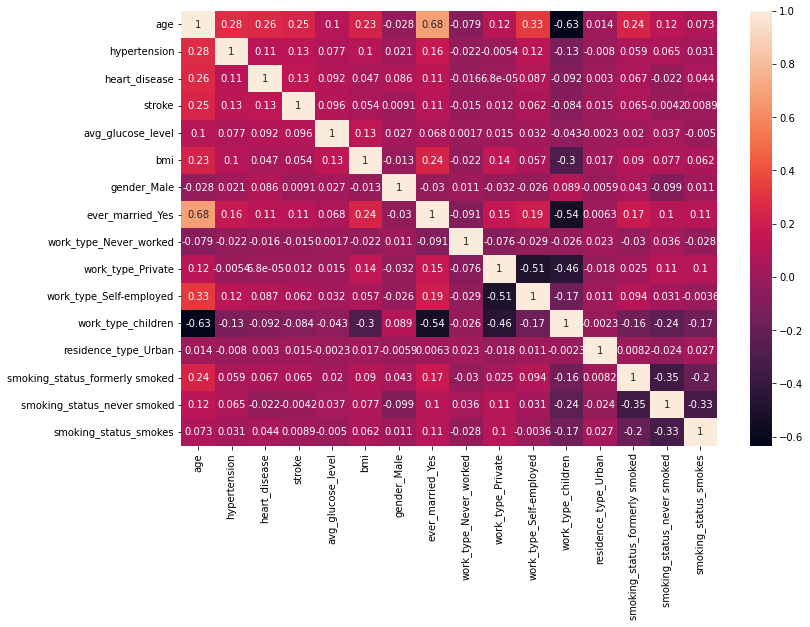

In [352]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True);

## The Implementattion of Logistic Methods

### Train | Test Split and Scaling

In [278]:
X = df.drop(["stroke"], axis=1)
y = df["stroke"]

In [280]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,)

In [281]:
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [282]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop columns with missing values):


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [279]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [272]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
print(); print(model)

[12:47:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [273]:
y_pred  = y_test
predicted_y = model.predict(X_test)

In [274]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [269]:
imputer = SimpleImputer(strategy='median')

model = XGBClassifier(eval_metric='logloss')

pipeline = Pipeline(steps=[('imputer', imputer),('model', model)])

kfold = KFold(n_splits=10, random_state=42, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold)
print(f'Accuracy: Results Mean : %{round(results.mean()*100,3)}, Results Standard Deviation : {round(results.std()*100,3)}')

Accuracy: Results Mean : %nan, Results Standard Deviation : nan


In [275]:
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [277]:
cols_with_missing = [col for col in X_pred.columns
                     if X_pred[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_pred = X_pred.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_pred, reduced_X_valid, y_train, y_valid))

NameError: name 'X_pred' is not defined

In [ ]:
# xg_reg = xgb.XGBRegressor(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10)

In [268]:
models = []

models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("GB", GaussianNB()))
models.append(("SVC", SVC()))

# evaluate each model in turn

results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    
    results.append(cv_results)
    names.append(name)
    
    print(f"{name}: {round(cv_results.mean(), 4)} ({round(cv_results.std(), 4)})")

LDA: nan (nan)
KNN: nan (nan)
DT: nan (nan)
GB: nan (nan)
SVC: nan (nan)


In [ ]:
results_df = pd.DataFrame(results, index=names).T
results_df

In [179]:
X.head()

age  hypertension  heart_disease  avg_glucose_level        bmi  \
0 67.0000000     0.0000000      1.0000000          1.8623916  1.0254995   
1 61.0000000     0.0000000      0.0000000          1.7005113        NaN   
2 80.0000000     0.0000000      1.0000000          0.3950311  0.5771556   
3 49.0000000     0.0000000      0.0000000          1.4451195  0.7916184   
4 79.0000000     1.0000000      0.0000000          1.4729183 -0.5680931   

   gender_Male  ever_married_Yes  work_type_Never_worked  work_type_Private  \
0            1                 1                       0                  1   
1            0                 1                       0                  0   
2            1                 1                       0                  1   
3            0                 1                       0                  1   
4            0                 1                       0                  0   

   work_type_Self-employed  work_type_children  residence_type_Urban  \
0                        0                   0                     1   
1                        1                   0                     0   
2                        0                   0                     0   
3                        0                   0                     1   
4                        1                   0                     0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
1                               0                            1   
2                               0                            1   
3                               0                            0   
4                               0                            1   

   smoking_status_smokes  
0                      0  
1                      0  
2                      0  
3                      1  
4                      0

In [180]:
y.head()

0   1.0000000
1   1.0000000
2   1.0000000
3   1.0000000
4   1.0000000
Name: stroke, dtype: float64

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import xgboost as xgb

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [244]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
print(); print(model)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [245]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [248]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [198]:
X_train = pd.DataFrame(X_train)
X_train

age  hypertension  heart_disease  avg_glucose_level        bmi  \
802  79.0000000     0.0000000      0.0000000          0.5611647  0.0811326   
3927 62.0000000     0.0000000      0.0000000         -0.2892915 -1.2188425   
2337 21.0000000     0.0000000      0.0000000         -1.8161025  0.7140269   
3910 31.0000000     0.0000000      0.0000000         -1.2416315 -0.8455520   
1886 31.0000000     0.0000000      0.0000000         -1.8066759 -1.2752842   
...         ...           ...            ...                ...        ...   
4426 43.0000000     0.0000000      0.0000000          1.1283918  0.2496239   
466  61.0000000     1.0000000      0.0000000          1.4334887  2.8958482   
3092  1.1600000     0.0000000      0.0000000          0.1466669 -1.6955940   
3772 80.0000000     0.0000000      0.0000000          0.0377153 -0.9834783   
860  46.0000000     0.0000000      0.0000000          0.2340552  2.2223148   

      gender_Male  ever_married_Yes  work_type_Never_worked  \
802             1                 1                       0   
3927            0                 1                       0   
2337            0                 0                       0   
3910            1                 1                       0   
1886            0                 0                       0   
...           ...               ...                     ...   
4426            1                 1                       0   
466             0                 1                       0   
3092            0                 0                       0   
3772            1                 1                       0   
860             0                 1                       0   

      work_type_Private  work_type_Self-employed  work_type_children  \
802                   0                        1                   0   
3927                  1                        0                   0   
2337                  1                        0                   0   
3910                  0                        0                   0   
1886                  1                        0                   0   
...                 ...                      ...                 ...   
4426                  0                        0                   0   
466                   1                        0                   0   
3092                  0                        0                   1   
3772                  0                        1                   0   
860                   1                        0                   0   

      residence_type_Urban  smoking_status_formerly smoked  \
802                      0                               1   
3927                     1                               0   
2337                     0                               0   
3910                     1                               1   
1886                     0                               0   
...                    ...                             ...   
4426                     0                               0   
466                      0                               0   
3092                     1                               0   
3772                     0                               1   
860                      0                               0   

      smoking_status_never smoked  smoking_status_smokes  
802                             0                      0  
3927                            0                      0  
2337                            1                      0  
3910                            0                      0  
1886                            1                      0  
...                           ...                    ...  
4426                            1                      0  
466                             0                      1  
3092                            0                      0  
3772                            0                      0  
860                             0                      1  


In [199]:
X_test = pd.DataFrame(X_test)
X_test

age  hypertension  heart_disease  avg_glucose_level        bmi  \
4688 31.0000000     0.0000000      0.0000000          0.3122533 -0.1795179   
4478 40.0000000     0.0000000      0.0000000          1.2476776  1.1868432   
3849  8.0000000     0.0000000      0.0000000         -1.0493545 -0.0400920   
4355 79.0000000     1.0000000      0.0000000          1.9887256  0.9103876   
3826 75.0000000     0.0000000      0.0000000         -0.9269480  1.1670528   
...         ...           ...            ...                ...        ...   
3605  1.8800000     0.0000000      0.0000000          1.9163479  2.3829996   
4934  1.3200000     0.0000000      0.0000000          0.1450974  0.3496818   
4835 49.0000000     1.0000000      0.0000000          1.7440512  0.2748890   
4105 56.0000000     0.0000000      0.0000000         -0.3335631  0.1857087   
2902 78.0000000     1.0000000      1.0000000          0.4078749 -0.0813817   

      gender_Male  ever_married_Yes  work_type_Never_worked  \
4688            1                 0                       0   
4478            1                 1                       0   
3849            0                 0                       0   
4355            0                 1                       0   
3826            0                 1                       0   
...           ...               ...                     ...   
3605            1                 0                       0   
4934            1                 0                       0   
4835            1                 1                       0   
4105            0                 0                       0   
2902            1                 1                       0   

      work_type_Private  work_type_Self-employed  work_type_children  \
4688                  0                        1                   0   
4478                  0                        1                   0   
3849                  0                        0                   1   
4355                  0                        1                   0   
3826                  0                        0                   0   
...                 ...                      ...                 ...   
3605                  0                        0                   1   
4934                  0                        0                   1   
4835                  0                        1                   0   
4105                  0                        1                   0   
2902                  0                        1                   0   

      residence_type_Urban  smoking_status_formerly smoked  \
4688                     0                               0   
4478                     0                               0   
3849                     1                               0   
4355                     0                               0   
3826                     0                               0   
...                    ...                             ...   
3605                     0                               0   
4934                     0                               0   
4835                     0                               1   
4105                     1                               0   
2902                     0                               0   

      smoking_status_never smoked  smoking_status_smokes  
4688                            0                      0  
4478                            1                      0  
3849                            0                      0  
4355                            1                      0  
3826                            1                      0  
...                           ...                    ...  
3605                            0                      0  
4934                            0                      0  
4835                            0                      0  
4105                            0                      1  
2902                            1                      0  


### Filling Mising Values

In [217]:
df.bmi.value_counts(dropna=False).index.sort_values()

Float64Index([-3.7396894770918796,  -3.396466745960006, -3.3313053063135043,
               -3.173021632491203, -3.0810554897290903,  -2.932460009012977,
               -2.874579935278967, -2.8175515546578547, -2.7893491255474956,
               -2.761350600476865,
              ...
                2.981858391154027,  3.0836550268981786,      3.148046099057,
               3.1711828074469746,   3.284719318324895,  3.5591980178592366,
                3.862446426383277,   4.475311329213484,   4.694041024829184,
                              nan],
             dtype='float64', length=419)

In [202]:
X_train[X_train.bmi.isnull()][['age','bmi']].sort_values(by='age').sample(20)

age  bmi
2494 78.0000000  NaN
1719 34.0000000  NaN
1837 60.0000000  NaN
4254 10.0000000  NaN
161  71.0000000  NaN
2529 71.0000000  NaN
2105 50.0000000  NaN
198  79.0000000  NaN
1306 54.0000000  NaN
162   1.3200000  NaN
3680 78.0000000  NaN
1194  3.0000000  NaN
5038 55.0000000  NaN
3561 27.0000000  NaN
4285 71.0000000  NaN
4712 57.0000000  NaN
3175  3.0000000  NaN
4948 31.0000000  NaN
3374 17.0000000  NaN
200  74.0000000  NaN

In [218]:
def fill_most(df, group_col, col_name):
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [226]:
X_train = fill_most(X_train, 'age', 'bmi')

Number of NaN :  0
------------------
-0.6637213    40
0.1727944     33
-0.3988041    33
0.0678541     32
-0.3539181    31
0.0007507     31
-0.0400920    31
-0.1371469    31
0.2241879     30
-0.1231282    30
0.2114052     29
-0.0264286    29
-0.1653413    29
-0.0813817    29
0.1075501     28
-0.2512096    28
-0.5523869    28
-0.5367455    27
-0.3390736    27
-0.4442287    27
-0.8625218    27
-0.2080316    27
-0.0538051    27
-0.2367620    27
0.0545286     26
-0.9834783    26
0.0943645     26
0.1985789     26
-0.6476150    26
0.1337836     26
-0.7618213    25
0.2369274     25
-0.5997021    25
-0.5211683    25
-0.4138852    25
-1.1084043    25
-0.1795179    24
-0.5680931    24
0.1598357     24
0.4471450     24
-1.2375638    24
0.6915593     23
0.4108920     23
0.6118448     23
-0.1091613    23
-0.7124545    23
0.2874583     23
0.0811326     23
0.3865274     23
0.1468322     23
0.3124714     23
-0.4290266    22
0.4591520     22
-0.1937478    22
-0.4902047    22
-0.0952460    22
0.5067996 

In [ ]:
#df.bmi.value_counts(dropna=False).isnull().sum()

In [227]:
X_test = fill_most(X_test, 'age', 'bmi')

Number of NaN :  0
------------------
-0.1512178    14
0.1075501     13
-0.3688210    11
-0.2512096    11
0.2748890     10
-0.3390736    10
-0.8625218    10
0.4230152     10
0.0142673     10
0.5538499      9
-0.7288389     9
-0.1937478     9
-0.1231282     8
0.3620038      8
-0.1653413     8
0.0277356      8
-0.0264286     8
-0.7784205     8
-1.7381392     8
0.9526580      8
-0.8795676     8
0.9421351      8
0.6462160      8
0.0411559      8
-0.4902047     8
-0.2223695     7
-1.1448628     7
0.7474774      7
-0.0675682     7
0.3124714      7
-0.0813817     7
-0.2080316     7
0.1857087      7
-0.5367455     7
0.4591520      6
-0.4442287     6
-0.6798963     6
0.7696130      6
0.8352447      6
-1.8028553     6
-0.3242871     6
-0.2802713     6
-0.5056549     6
0.4471450      6
0.1337836      6
-0.7452943     6
0.5771556      6
0.0678541      6
-0.5838647     6
-0.0400920     6
-1.6535159     6
-1.0722912     6
0.6003173      6
-0.1795179     5
-0.5680931     5
-1.5502995     5
-1.0187553

In [228]:
scaler = MinMaxScaler()

In [229]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Modelling

In [223]:
from sklearn.linear_model import LogisticRegression

In [224]:
log_model=LogisticRegression(class_weight = "balanced")

In [225]:
log_model.fit(X_train_scaled, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').